**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [61]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
import pandas as pd

from exam import ProductionEconomy
from exam import CareerChoice
from exam import Barycentric

from exam import count, plot_career, plot_exp_utility, plot_realized_utility, count2, plot_switch, findABCD, barycentric_c, bary_in_tri, f

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [3]:
# initialize an instance of the ProductionEconomy class
economy = ProductionEconomy()

NameError: name 'ProductionEconomy' is not defined

In [1]:
p1_val = np.linspace(0.1, 2.0, 10)
p2_val = np.linspace(0.1, 2.0, 10)
w = 1.0

n = 0
for p1 in p1_val:
    for p2 in p2_val:
        errors = (economy.market_error(p1,p2,w))
        n += 1
        if n < 5:
            print(f'For p1 = {p1:.2f}, p2 = {p2:.2f}, excess demand is:\n labor = {errors[0]:.3f}, good 1: {errors[1]:.3f}, good 2: {errors[2]:.3f}')
        elif errors == 0:
            print(f'for p1 = {p1:.2f}, p2 = {p2:.2f} all markets clear')
        elif errors[0] == 0:
            print(f'for p1 = {p1:.2f}, p2 = {p2:.2f} labor market clears.\n Excess demand for good 1: {errors[1]:.3f}, good2: {errors[2]:.3f}')
        elif errors[1] == 0:
            print(f'for p1 = {p1:.2f}, p2 = {p2:.2f} market for good 1 clears.\n Excess demand for labor: {errors[0]:.3f}, good2: {errors[2]:.3f}')
        elif errors[2] == 0:
            print(f'for p1 = {p1:.2f}, p2 = {p2:.2f} market for good 2 clears.\n Excess demand for labor: {errors[0]:.3f}, good1: {errors[1]:.3f}')
        else:
            print(f'...\n searching, markets do not clear...')

check = economy.check_market_clearing(p1_val,p2_val,w)

NameError: name 'np' is not defined

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [2]:
equi = economy.find_equilibrium_prices(w)

NameError: name 'economy' is not defined

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

In [55]:
par = SimpleNamespace()
par.N = 10
par.K = 10000

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [50]:
career = CareerChoice(1999)
EU = career.utility()

print(f'E[(u_i,1^k|v_1)] = {EU[0]:.4f}')
print(f'E[(u_i,2^k|v_1)] = {EU[1]:.4f}')
print(f'E[(u_i,3^k|v_1)] = {EU[2]:.4f}')

E[(u_i,1^k|v_1)] = 1.0161
E[(u_i,2^k|v_1)] = 1.9960
E[(u_i,3^k|v_1)] = 3.0030


**Question 1 solution:** <br><br>
We use the seed 1999 for the identical random draws of each of the career uncertainty parameters, $\epsilon^k_{i,j}$. 

This yields the following expected utilities for each career choice, $j$, and thus average realized utility, when averaging over the K = 10,000 draws:

$$
    \mathbb{E}\left[ u^k_{i,1}\vert v_1 \right] \approx 1.0161 \\
    \mathbb{E}\left[ u^k_{i,2}\vert v_2 \right] \approx 1.9960 \\
    \mathbb{E}\left[ u^k_{i,3}\vert v_2 \right] \approx 3.0030
$$
<br><br>

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

The following is the simulation and visualization of the share of graduates choosing each career for each type, $i$:

In [52]:
# we call the simulation function that creates three dictionaries.
# the first dictionary, careerdict, contains the 10,000 career choices for each type of graduate.
# the second dictionary, EVdict, contains the expected value of the 10,000 career choices made by each type of graduate.
# the third dictionary, RVdict, contains the realized value of the 10,000 careers chosen by each type of graduate.
careerdict, EVdict, RVdict = career.simulate()

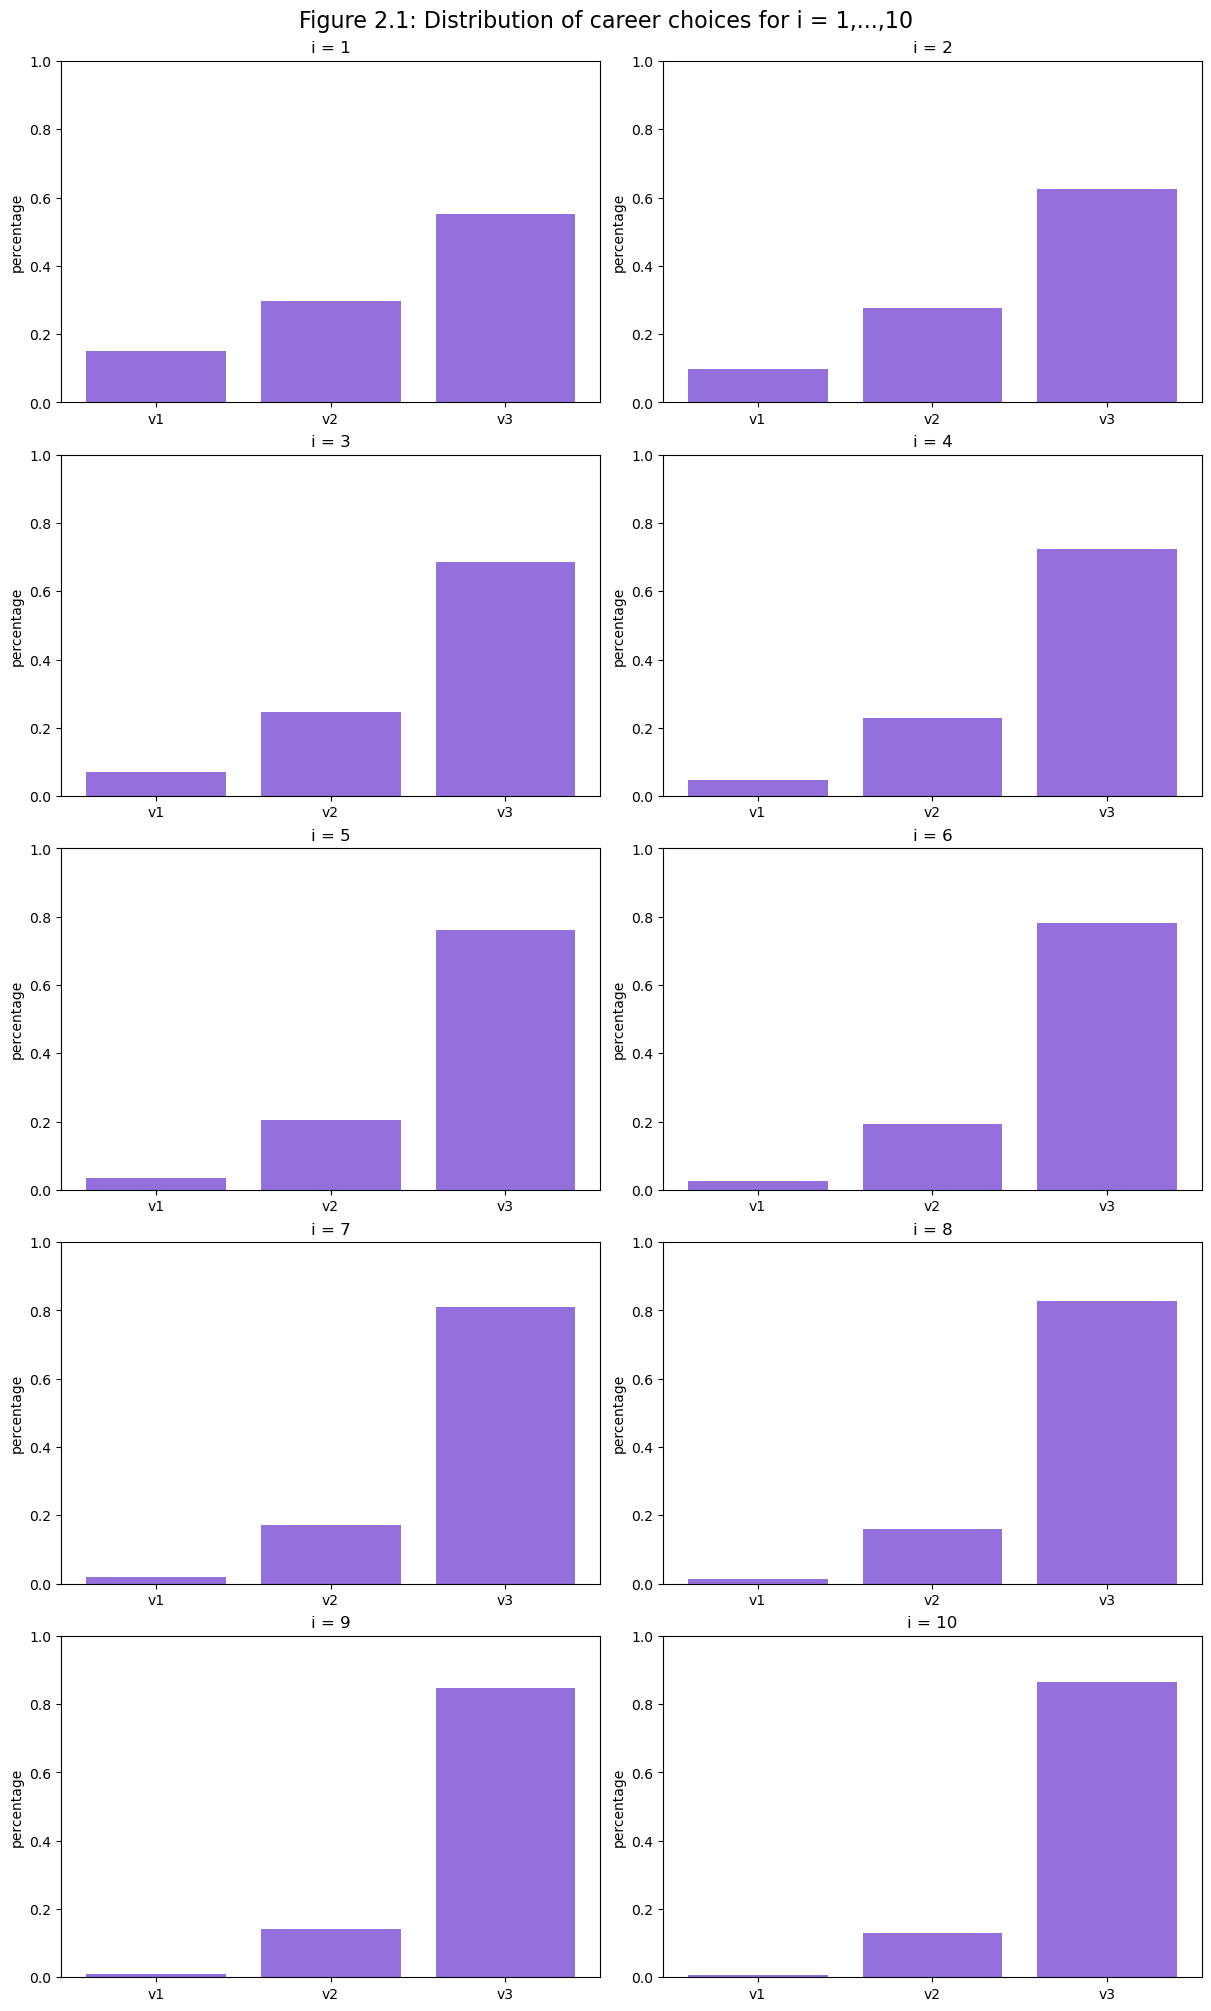

In [53]:
# first, we focus on the career dictionary
# by creating 10 separate lists, we can count the number of times each career is chosen by each type of graduate.
# C1 contains the number of times each career is chosen by type 1 graduates, C2 by type 2 graduates, and so on.
# the count function, defined in the exam_2024.py file, takes a dictionary as input and returns a list with a count of times each variable occurs.
# the count function is called for each type of graduate.
C1 = count(careerdict[1])
C2 = count(careerdict[2])
C3 = count(careerdict[3])
C4 = count(careerdict[4])
C5 = count(careerdict[5])
C6 = count(careerdict[6])
C7 = count(careerdict[7])
C8 = count(careerdict[8])
C9 = count(careerdict[9])
C10 = count(careerdict[10])

# the plot function, defined in the exam_2024.py file, plots the number of times each career is chosen by each type of graduate.
# it is made into one big figure with 10 subplots, one for each type of graduate.
plot_career(C1, C2, C3, C4, C5, C6, C7, C8, C9, C10)

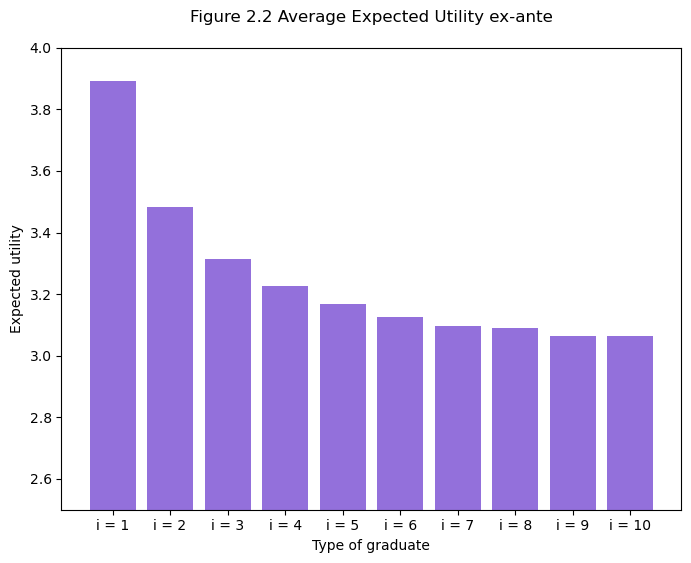

In [82]:
# secondly, we focus on the expected value dictionary.
# we sum the expected value of the 10,000 career choices made by each type of graduate and divide by the number of graduates.
# this gives us the expected utility ex ante for each type of graduate.
EV1 = sum(EVdict[1])/par.K
EV2 = sum(EVdict[2])/par.K
EV3 = sum(EVdict[3])/par.K
EV4 = sum(EVdict[4])/par.K
EV5 = sum(EVdict[5])/par.K
EV6 = sum(EVdict[6])/par.K
EV7 = sum(EVdict[7])/par.K
EV8 = sum(EVdict[8])/par.K
EV9 = sum(EVdict[9])/par.K
EV10 = sum(EVdict[10])/par.K

EU = [EV1, EV2, EV3, EV4, EV5, EV6, EV7, EV8, EV9, EV10]

# now we plot the expected utility ex ante for each type of graduate in a bar chart.
plot_exp_utility(EU,'Figure 2.2 Average Expected Utility ex-ante\n')

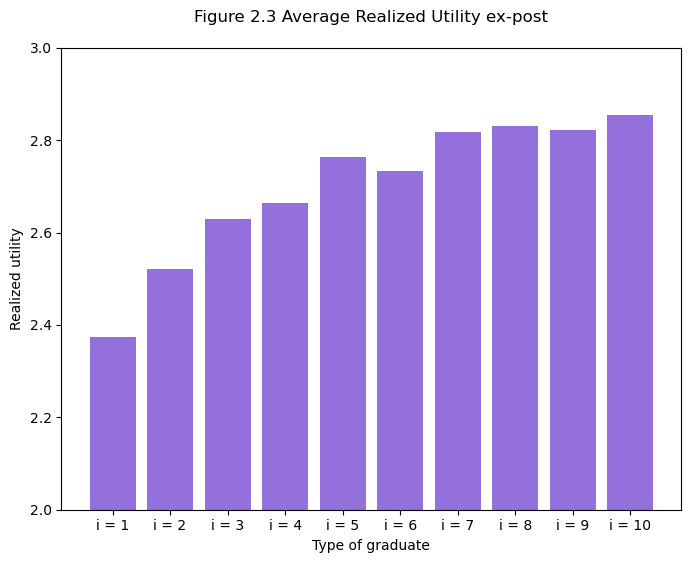

In [83]:
# thirdly, we focus on the realized value dictionary.
# we sum the realized value of the 10,000 career choices made by each type of graduate and divide by the number of graduates.
# this gives us the realized utility ex post for each type of graduate.
RV1 = sum(RVdict[1])/par.K
RV2 = sum(RVdict[2])/par.K
RV3 = sum(RVdict[3])/par.K
RV4 = sum(RVdict[4])/par.K
RV5 = sum(RVdict[5])/par.K
RV6 = sum(RVdict[6])/par.K
RV7 = sum(RVdict[7])/par.K
RV8 = sum(RVdict[8])/par.K
RV9 = sum(RVdict[9])/par.K
RV10 = sum(RVdict[10])/par.K

RV = [RV1, RV2, RV3, RV4, RV5, RV6, RV7, RV8, RV9, RV10]

# now we plot the realized utility ex post for each type of graduate in a bar chart.
plot_realized_utility(RV, 'Figure 2.3 Average Realized Utility ex-post\n')

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [75]:
# running the career_alt function from the class, we save the output in four dictionaries.
# switchdict contains a binary value, representing whether the graduate switches career or not.
# a value of 1 suggests that the graduate switches career, while a value of 0 suggests that the graduate does not switch career.

# carerdict_alt contains the mew career choice made by the graduate.

# EVdict_alt contains the expected value of the new career choice made by the graduate.
# for a graduate that does not switch career, the expected value is simply the realized value
# of the career they chose originally. For a graduate that switches career, the new expected
# value is calculated as in the previous questions, but for the new career choice.

# RVdict_alt contains the realized value of the new career choice made by the graduate.
# for a graduate that does not switch career, the realized value is simply the realized value
# of the career they chose originally. For a graduate that switches career, the new realized
# value is calculated as in the previous questions, but for the new career choice.
switchdict, careerdict_alt, EVdict_alt, RVdict_alt = career.career_alt(careerdict, RVdict)

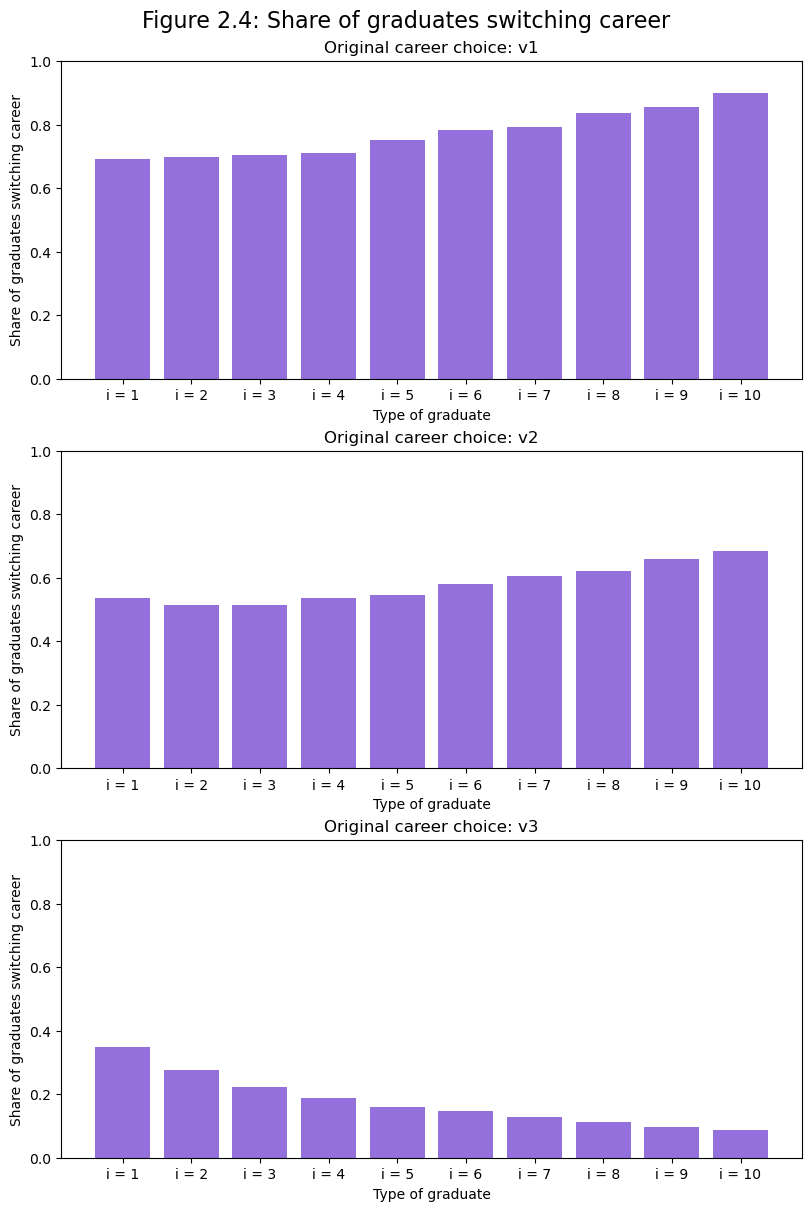

In [76]:
v1_original, v2_original, v3_original = career.sort_career(switchdict, careerdict_alt)

S1_v1_original = count2(v1_original[1])
S2_v1_original = count2(v1_original[2])
S3_v1_original = count2(v1_original[3])
S4_v1_original = count2(v1_original[4])
S5_v1_original = count2(v1_original[5])
S6_v1_original = count2(v1_original[6])
S7_v1_original = count2(v1_original[7])
S8_v1_original = count2(v1_original[8])
S9_v1_original = count2(v1_original[9])
S10_v1_original = count2(v1_original[10])

S_v1_orgiginal = [S1_v1_original, S2_v1_original, S3_v1_original, S4_v1_original, S5_v1_original, S6_v1_original, S7_v1_original, S8_v1_original, S9_v1_original, S10_v1_original]

S1_v2_original = count2(v2_original[1])
S2_v2_original = count2(v2_original[2])
S3_v2_original = count2(v2_original[3])
S4_v2_original = count2(v2_original[4])
S5_v2_original = count2(v2_original[5])
S6_v2_original = count2(v2_original[6])
S7_v2_original = count2(v2_original[7])
S8_v2_original = count2(v2_original[8])
S9_v2_original = count2(v2_original[9])
S10_v2_original = count2(v2_original[10])

S_v2_original = [S1_v2_original, S2_v2_original, S3_v2_original, S4_v2_original, S5_v2_original, S6_v2_original, S7_v2_original, S8_v2_original, S9_v2_original, S10_v2_original]

S1_v3_original = count2(v3_original[1])
S2_v3_original = count2(v3_original[2])
S3_v3_original = count2(v3_original[3])
S4_v3_original = count2(v3_original[4])
S5_v3_original = count2(v3_original[5])
S6_v3_original = count2(v3_original[6])
S7_v3_original = count2(v3_original[7])
S8_v3_original = count2(v3_original[8])
S9_v3_original = count2(v3_original[9])
S10_v3_original = count2(v3_original[10])

S_v3_original = [S1_v3_original, S2_v3_original, S3_v3_original, S4_v3_original, S5_v3_original, S6_v3_original, S7_v3_original, S8_v3_original, S9_v3_original, S10_v3_original]

plot_switch(S_v1_orgiginal, S_v2_original, S_v3_original)

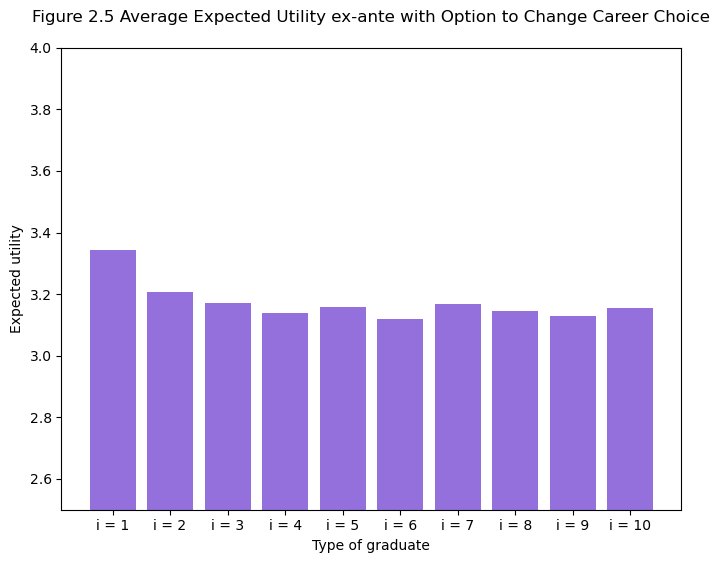

In [80]:
EV1_alt = sum(EVdict_alt[1])/par.K
EV2_alt = sum(EVdict_alt[2])/par.K
EV3_alt = sum(EVdict_alt[3])/par.K
EV4_alt = sum(EVdict_alt[4])/par.K
EV5_alt = sum(EVdict_alt[5])/par.K
EV6_alt = sum(EVdict_alt[6])/par.K
EV7_alt = sum(EVdict_alt[7])/par.K
EV8_alt = sum(EVdict_alt[8])/par.K
EV9_alt = sum(EVdict_alt[9])/par.K
EV10_alt = sum(EVdict_alt[10])/par.K

EU_alt = [EV1_alt, EV2_alt, EV3_alt, EV4_alt, EV5_alt, EV6_alt, EV7_alt, EV8_alt, EV9_alt, EV10_alt]
plot_exp_utility(EU_alt, 'Figure 2.5 Average Expected Utility ex-ante with Option to Change Career Choice\n')

TypeError: only length-1 arrays can be converted to Python scalars

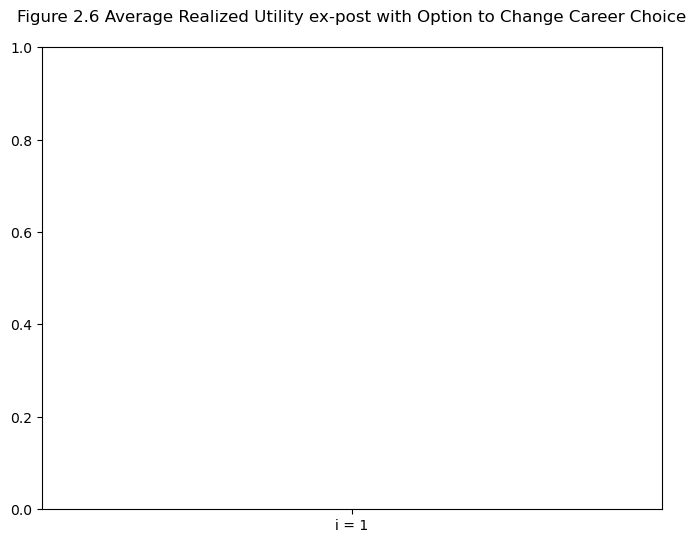

In [85]:
RV1_alt = sum(RVdict_alt[1])/par.K
RV2_alt = sum(RVdict_alt[2])/par.K
RV3_alt = sum(RVdict_alt[3])/par.K
RV4_alt = sum(RVdict_alt[4])/par.K
RV5_alt = sum(RVdict_alt[5])/par.K
RV6_alt = sum(RVdict_alt[6])/par.K
RV7_alt = sum(RVdict_alt[7])/par.K
RV8_alt = sum(RVdict_alt[8])/par.K
RV9_alt = sum(RVdict_alt[9])/par.K
RV10_alt = sum(RVdict_alt[10])/par.K

RV_alt = [RV1_alt, RV2_alt, RV3_alt, RV4_alt, RV5_alt, RV6_alt, RV7_alt, RV8_alt, RV9_alt, RV10_alt]
plot_realized_utility(RV_alt, 'Figure 2.6 Average Realized Utility ex-post with Option to Change Career Choice\n')

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [36]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [37]:
A, B, C, D = findABCD(rng,X,y)

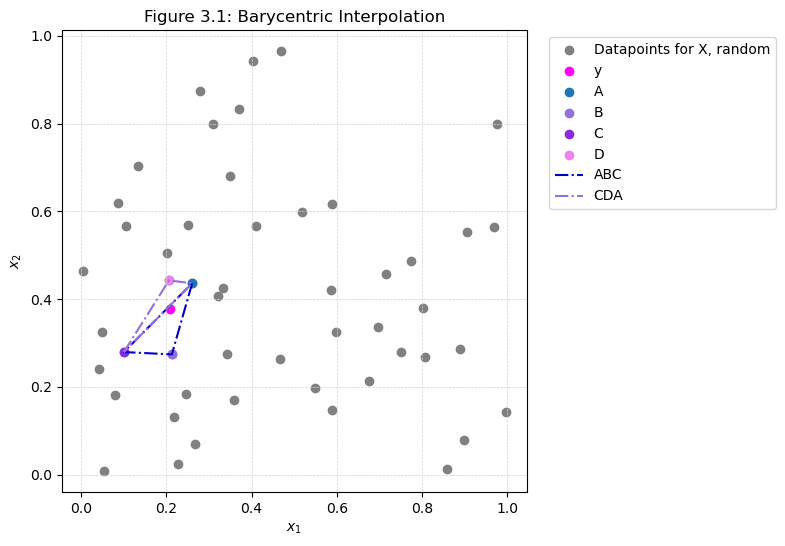

In [39]:
model3 = Barycentric(rng,X,y,A,B,C,D)
model3.plotABCD()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [40]:
r_1_ABC, r_2_ABC, r_3_ABC = barycentric_c(A, B, C, y)
r_1_CDA, r_2_CDA, r_3_CDA = barycentric_c(C, D, A, y)

if bary_in_tri(r_1_CDA, r_2_CDA, r_3_CDA):
    f_y = r_1_CDA * f(C[0], C[1]) + r_2_CDA * f(D[0], D[1]) + r_3_CDA * f(A[0], A[1])
    print(f"Y is inside CDA. \nf(y) = {f_y:.4f}")
elif bary_in_tri(r_1_ABC, r_2_ABC, r_3_ABC):
    f_y = r_1_ABC * f(A[0], A[1]) + r_2_ABC * f(B[0], B[1]) + r_3_ABC * f(C[0], C[1])
    print(f"y is inside ABC. \nf(y) = {f_y:.4f}")
else:
    print("y isn't in the triangles. Undefined f(y)")

y is inside ABC. 
f(y) = 0.5868


y is in ABC, as we already suspected in Question 1, but we have now shown it numerically.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [41]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [42]:
#First, we interpolate the value of f(y) with bary coordinates
if bary_in_tri(r_1_CDA, r_2_CDA, r_3_CDA):
    f_yapprox = r_1_CDA * f(C) + r_2_CDA * f(D) + r_3_CDA * f(A)
    print(f"Triangle CDA: Approximated f(y) = {f_yapprox:.4f}")
elif bary_in_tri(r_1_ABC, r_2_ABC, r_3_ABC):
    f_yapprox = r_1_ABC * f(A) + r_2_ABC * f(B) + r_3_ABC * f(C)
    print(f"Triangle ABC: Approximated f(y) = {f_yapprox:.4f}")
else: 
    f_yapprox = None
    print("Not in triangles: f(y) = NaN")

f_ytrue = f(y)
Difference = f_yapprox - f_ytrue

print(f"f(y) true value = {f_ytrue:.4f}")
print(f'The difference between the approximated and the true value is {Difference:.3f}')

Triangle ABC: Approximated f(y) = 0.0841
f(y) true value = 0.0790
The difference between the approximated and the true value is 0.005


The approximated value is interpolated where we used the Barycentric coordinates. It was obtained by weighting the function values at the vertices of triangle ABC.  
We found the true value directly from f(x_1, x_2) = x_1*x_2 where we use the coordinates of y.  

The small difference between the two values indicates that our approximation was quite accurate with Barycentrinc Interpolation.

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [43]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

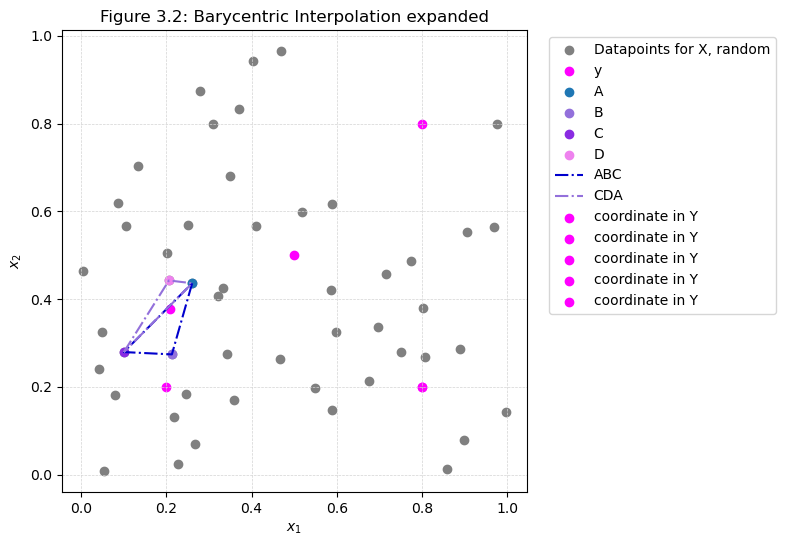

In [44]:
model3.plotABCD_alt(Y)

This shows that for the given values of Y, none of the points lie in the triangles. Therefore, the function f(y) is undefined within the triangles. This can also be seen graphically in the plot above.